# Question 5

In [1]:
import requests
import json
from bs4 import BeautifulSoup

def download_and_extract_data(api_url):
    # Send GET request to the API
    response = requests.get(api_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = json.loads(response.text)
        
        # Extract show information
        show_info = {
            "id": data["id"],
            "url": data["url"],
            "name": data["name"],
            "type": data["type"],
            "season": None,
            "number": None,
            "airdate": None,
            "airtime": None,
            "runtime": None,
            "average_rating": None,
            "summary": None,
            "medium_image_link": None,
            "original_image_link": None
        }
        
        # Extract episode information
        episodes = data["_embedded"]["episodes"]
        episode_info = []
        for episode in episodes:
            episode_data = {
                "id": episode["id"],
                "url": episode["url"],
                "name": episode["name"],
                "season": episode["season"],
                "number": episode["number"],
                "type": episode["type"],
                "airdate": episode["airdate"],
                "airtime": episode["airtime"],
                "runtime": episode["runtime"],
                "average_rating": episode["rating"]["average"],
                "summary": None,
                "medium_image_link": episode["image"]["medium"],
                "original_image_link": episode["image"]["original"]
            }
            
            # Extract episode summary without HTML tags
            summary_html = episode["summary"]
            summary_text = BeautifulSoup(summary_html, "html.parser").get_text()
            episode_data["summary"] = summary_text
            
            episode_info.append(episode_data)
        
        return show_info, episode_info
    else:
        # Request was not successful
        print(f"Error: {response.status_code} - {response.reason}")

# API URL
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download and extract data
show_info, episode_info = download_and_extract_data(api_url)

# Print show information
print("Show Information:")
print(f"ID: {show_info['id']}")
print(f"URL: {show_info['url']}")
print(f"Name: {show_info['name']}")
print(f"Type: {show_info['type']}")
print()

# Print episode information
print("Episode Information:")
for episode in episode_info:
    print(f"ID: {episode['id']}")
    print(f"URL: {episode['url']}")
    print(f"Name: {episode['name']}")
    print(f"Season: {episode['season']}")
    print(f"Number: {episode['number']}")
    print(f"Type: {episode['type']}")
    print(f"Airdate: {episode['airdate']}")
    print(f"Airtime: {episode['airtime']}")
    print(f"Runtime: {episode['runtime']}")
    print(f"Average Rating: {episode['average_rating']}")
    print(f"Summary: {episode['summary']}")
    print(f"Medium Image Link: {episode['medium_image_link']}")
    print(f"Original Image Link: {episode['original_image_link']}")
    


Show Information:
ID: 1371
URL: https://www.tvmaze.com/shows/1371/westworld
Name: Westworld
Type: Scripted

Episode Information:
ID: 869671
URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
ID: 911201
URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Name: Chestnut
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtim

# Question 8


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.DataFrame(episode_info)
df

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [8]:
season_ratings = df.groupby('season')['average_rating'].mean()

In [9]:
season_ratings

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64

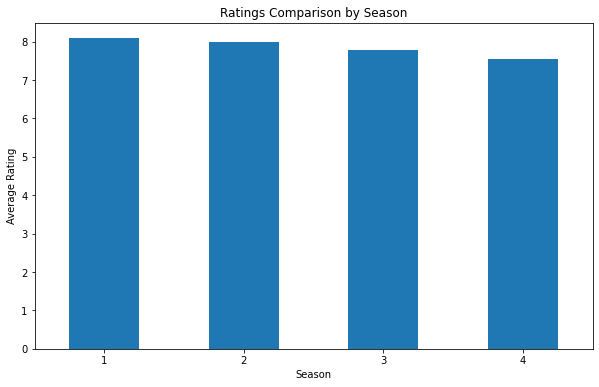

In [10]:
plt.figure(figsize=(10, 6))
season_ratings.plot(kind="bar", rot=0)
plt.title("Ratings Comparison by Season")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.show()

# Get all the episode names, whose average rating is more than 8 for every season

In [11]:
df1 = df[df['average_rating']>8.0]

In [15]:
df1[['name','season', 'average_rating']]

,name,season,average_rating
6,Trompe L'Oeil,1,8.6
8,The Well-Tempered Clavier,1,8.5
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
18,Vanishing Point,2,8.4
19,The Passenger,2,8.5


# Get all the episode names that aired before May 2019

In [17]:
df2 = df[df['airdate']<'2019-05']

In [18]:
df2 = df[['name', 'season', 'airdate']]
df2

,name,season,airdate
0,The Original,1,2016-10-02
1,Chestnut,1,2016-10-09
2,The Stray,1,2016-10-16
3,Dissonance Theory,1,2016-10-23
4,Contrapasso,1,2016-10-30
5,The Adversary,1,2016-11-06
6,Trompe L'Oeil,1,2016-11-13
7,Trace Decay,1,2016-11-20
8,The Well-Tempered Clavier,1,2016-11-27
9,The Bicameral Mind,1,2016-12-04


# Get the episode name from each season with the highest and lowest rating

In [25]:
highest_rating_episodes = df.groupby('season')['average_rating'].idxmax()
lowest_rating_episodes = df.groupby('season')['average_rating'].idxmin()
print(highest_rating_episodes)
print(lowest_rating_episodes)

season
1     9
2    17
3    20
4    32
Name: average_rating, dtype: int64
season
1     2
2    14
3    25
4    28
Name: average_rating, dtype: int64


In [26]:
highest_rating_episodes = df.loc[highest_rating_episodes, ["season", "name"]]
lowest_rating_episodes = df.loc[lowest_rating_episodes, ["season", "name"]]

In [27]:
print(highest_rating_episodes)
print(lowest_rating_episodes)

    season                name
9        1  The Bicameral Mind
17       2             Kiksuya
20       3        Parce Domine
32       4            Zhuangzi
    season          name
2        1     The Stray
14       2  Akane No Mai
25       3   Decoherence
28       4  The Auguries


In [28]:
most_popular_episodes_summary = df.groupby("season").apply(lambda x: x.loc[x["average_rating"].idxmax(), "summary"])

In [29]:
most_popular_episodes_summary

season
1    Delores finds out the truth about William's fa...
2    Another of Westworld's Host revolutionaries is...
3    If you're stuck in a loop, try walking in a st...
4                                        God is bored.
dtype: object